
# Definição do Problema e Objetivo do Código

Aplicação de modelo Machine learning na manutenção preditiva previne falhas em equipamentos industriais ao analisar dados, evitando paradas não planejadas. Foram disponibilizados dados de 5 sensores presentes em uma máquina industrial. Devido a esses dados virem de sistemas reais podem ruídos e falhas dos sensores/equipamentos, para isso é necessário realizar as etapas de análise exploratória e processamento dos dados.

- Análise exploratória

- Processamento dos dados

In [389]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%reload_ext watermark
%watermark -a "Eric Mochiutti" --iversions

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.8
Author: Eric Mochiutti

pandas    : 1.5.2
seaborn   : 0.12.2
numpy     : 1.23.5
matplotlib: 3.6.2



# Análise Exploratória

- Carregando dados brutos dos sensores e as classes de problemas

In [360]:
label_defeito = np.load('data/Classes.npy', allow_pickle=True)
dados_s1 = np.load('data/Dados_1.npy', allow_pickle=True)
dados_s2 = np.load('data/Dados_2.npy', allow_pickle=True)
dados_s3 = np.load('data/Dados_3.npy', allow_pickle=True)
dados_s4 = np.load('data/Dados_4.npy', allow_pickle=True)
dados_s5 = np.load('data/Dados_5.npy', allow_pickle=True)


- Verificação da quantidade de dados, dos tamanhos dos arrays e verificação se os tamanhos dos arrays são compatíveis

In [ ]:
print(label_defeito.shape)  # (50000, 1)
print(dados_s1.shape)     # (50000, 201)
print(dados_s2.shape)     # (50000, 201)
print(dados_s3.shape)     # (50000, 201)
print(dados_s4.shape)     # (50000, 200)
print(dados_s5.shape)     # (50000, 200)


- Verificação do balanceamento das classes (classes de defeitos)

In [362]:
labels_unicas, contagem_ocorrencias = np.unique(label_defeito, return_counts=True)
for label, contagem in zip(labels_unicas, contagem_ocorrencias):
    print("Label:", label, " - Quantidade de ocorrências:", contagem)


Label: Classe A  - Quantidade de ocorrências: 10000
Label: Classe B  - Quantidade de ocorrências: 10000
Label: Classe C  - Quantidade de ocorrências: 10000
Label: Classe D  - Quantidade de ocorrências: 10000
Label: Classe E  - Quantidade de ocorrências: 10000


- Plotando gráficos dos sensores para avaliação visual do comportamento dos sensores ao longo do tempo

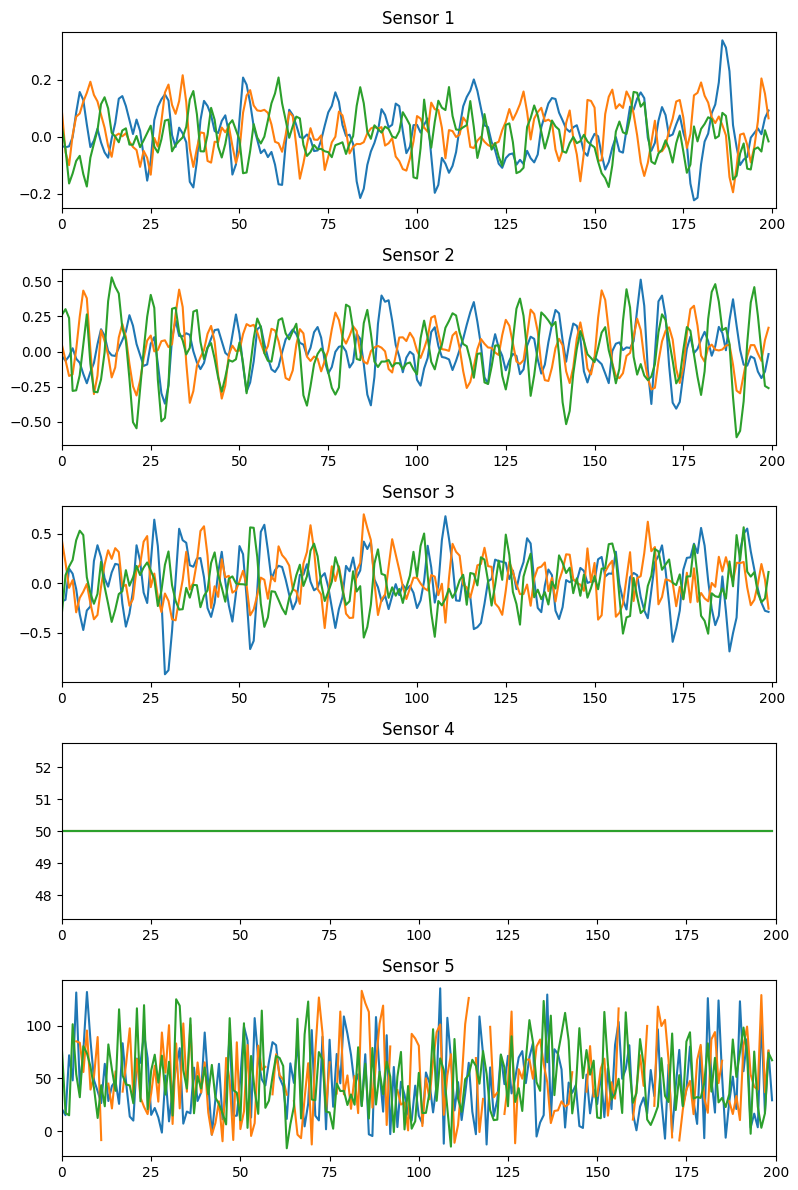

In [363]:
sensores = [dados_s1, dados_s2, dados_s3, dados_s4, dados_s5]

fig, axs = plt.subplots(len(sensores), 1, figsize=(8, 12))

# Plotando os dados em subplots separados
for i, sensor in enumerate(sensores):
    for linha in range(0, 10001, 5000):
        axs[i].plot(sensor[linha, :])
    axs[i].set_title(f'Sensor {i+1}')
    
    # Definindo os limites do eixo x para cada sensor
    xmin = 0
    xmax = sensor.shape[1]

    axs[i].set_xlim(xmin, xmax)

plt.tight_layout()
plt.show()

- Verificar a existência de valores NaN, quantidade de valores NaN, valores mínimos e máximos dos dados de cada sensor (verificar ordem de grandeza)

In [364]:
# Função para verificar a existência de NaN e contar a quantidade
def verificar_e_contar_nan(dados):
    tem_nan = np.isnan(dados)
    quantidade_nan = np.count_nonzero(tem_nan)
    return quantidade_nan

# Função para calcular métricas importantes de um conjunto de dados
def calcular_metricas(conjuntos_de_dados):
    for i, dados in enumerate(conjuntos_de_dados, start=1):
        print(f"\nMétricas para o conjunto de dados s{i}:")
        dados_sem_nan = dados[~np.isnan(dados)]
        total_de_dados = len(dados_sem_nan)
        valor_minimo = np.min(dados_sem_nan)
        valor_maximo = np.max(dados_sem_nan)

        print("Total de dados:", total_de_dados)
        print("Valor mínimo:", valor_minimo)
        print("Valor máximo:", valor_maximo)

        # Verificar a existência e contar a quantidade de valores NaN
        quantidade_nan = verificar_e_contar_nan(dados)
        if quantidade_nan > 0:
            print(f"No conjunto de dados s{i}: Quantidade de valores NaN:", quantidade_nan)
        else:
            print(f"No conjunto de dados s{i}: Não existem valores NaN.")

# Calculando métricas para os sensores
calcular_metricas(sensores)



Métricas para o conjunto de dados s1:
Total de dados: 10000001
Valor mínimo: -0.500583548307494
Valor máximo: 5.0
No conjunto de dados s1: Quantidade de valores NaN: 49999

Métricas para o conjunto de dados s2:
Total de dados: 10000001
Valor mínimo: -1.239735330040627
Valor máximo: 5.0
No conjunto de dados s2: Quantidade de valores NaN: 49999

Métricas para o conjunto de dados s3:
Total de dados: 10000001
Valor mínimo: -1.557491418788932
Valor máximo: 5.0
No conjunto de dados s3: Quantidade de valores NaN: 49999

Métricas para o conjunto de dados s4:
Total de dados: 9990000
Valor mínimo: 50.0
Valor máximo: 50.0
No conjunto de dados s4: Quantidade de valores NaN: 10000

Métricas para o conjunto de dados s5:
Total de dados: 9758488
Valor mínimo: -19.964571047700915
Valor máximo: 139.99831052645226
No conjunto de dados s5: Quantidade de valores NaN: 241512


- Verificar a distribuição dos NaN nos dados brutos dos sensores para decisão de como tratar os valores nulos

In [365]:
sensores = [dados_s1, dados_s2, dados_s3, dados_s4, dados_s5]

for i, sensor in enumerate(sensores, start=1):
    nan_indices = np.argwhere(np.isnan(sensor))
    if len(nan_indices) > 0:
        print(f"No sensor {i}: Valores NaN encontrados nos índices:")
        print(nan_indices)
        
        # Verificando se há repetição nos índices
        unique_indices = np.unique(nan_indices[:, 1])  # Obtém os índices únicos das colunas
        if len(unique_indices) == 1:
            print(f"No sensor {i}: Todos os NaN estão na coluna {unique_indices[0]}.")
        else:
            print(f"No sensor {i}: Os NaN estão distribuídos em diferentes colunas.")
    else:
        print(f"No sensor {i}: Nenhum valor NaN encontrado.")

No sensor 1: Valores NaN encontrados nos índices:
[[    0   200]
 [    1   200]
 [    2   200]
 ...
 [49997   200]
 [49998   200]
 [49999   200]]
No sensor 1: Todos os NaN estão na coluna 200.
No sensor 2: Valores NaN encontrados nos índices:
[[    0   200]
 [    1   200]
 [    2   200]
 ...
 [49997   200]
 [49998   200]
 [49999   200]]
No sensor 2: Todos os NaN estão na coluna 200.
No sensor 3: Valores NaN encontrados nos índices:
[[    0   200]
 [    1   200]
 [    2   200]
 ...
 [49997   200]
 [49998   200]
 [49999   200]]
No sensor 3: Todos os NaN estão na coluna 200.
No sensor 4: Valores NaN encontrados nos índices:
[[    3   139]
 [   12   159]
 [   13   151]
 ...
 [49966    12]
 [49982    95]
 [49997   138]]
No sensor 4: Os NaN estão distribuídos em diferentes colunas.
No sensor 5: Valores NaN encontrados nos índices:
[[    1    32]
 [    1    35]
 [    1    38]
 ...
 [49999   110]
 [49999   137]
 [49999   160]]
No sensor 5: Os NaN estão distribuídos em diferentes colunas.


--> Análise: Observe que para os Sensores 1, 2, 3 todos os NaN são encontrados no ultimo valor de medida do sensor (vetor 201), já para os sensores 4 e 5 estão distribuidos nos dados. Devido aos dados possuirem tamanhos diferentes como visto inicialmente, (50000x201) para S1, S2 e S3, (50000x200) para S4 e S5, podemos excluir os dados finais NaNs de S1,S2, S3.


- Realizar o plot dos sensores S4 e S5, para ver como serão tratados esses valores de NaN distribuidos ao longo dos dados dos sensores.

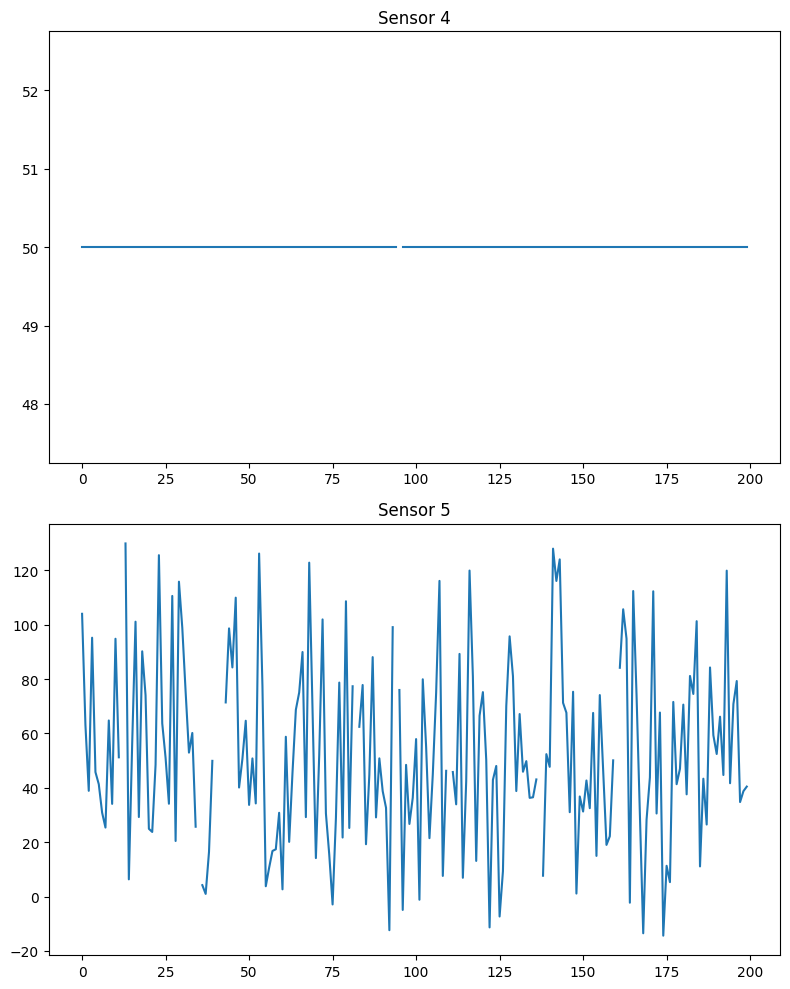

In [366]:
# Suponha que você tenha os dados dos sensores dados_s4 e dados_s5
sensores_NaN_distribuidos = [dados_s4, dados_s5]

# Criando subplots para cada sensor
fig, axs = plt.subplots(len(sensores_NaN_distribuidos), 1, figsize=(8, 10))

axs[0].plot(sensores_NaN_distribuidos[0][49982, :], label='dados_s4')
axs[0].set_title('Sensor 4')

axs[1].plot(sensores_NaN_distribuidos[1][49999, :], label='dados_s5')
axs[1].set_title('Sensor 5')


plt.tight_layout()
plt.show()

# Decisão sobre o tratamento dos valores de NaN: 

- Sensores S1, S2, S3 terão os valores de NaN removidos do ultimo instante de tempo (201).

- Sensor 4, os valores de NaN serão substituidos por 50.0.

- No Sensor 5, os valores NaN serão calculados por meio de interpolação linear e substituídos pelos valores calculados. No entanto, os valores que estão no tempo inicial e tempo final não podem ser interpolados e, portanto, também precisam ser substituídos por zero.

# Processamento dos dados

In [367]:
#Remoção dos valores NaN dos ultimos instantes de tempo
dados_s1_NaN_remove = dados_s1[:,:200]
dados_s2_NaN_remove = dados_s2[:,:200]
dados_s3_NaN_remove = dados_s3[:,:200]

#Conversão em pandas
df_dados_s4 = pd.DataFrame(dados_s4)
df_dados_s5 = pd.DataFrame(dados_s5)

# Substituir NaN por 50. no sensor S4
df_dados_s4_preenchidos = df_dados_s4.fillna(50.)

# Interpolar para preencher os valores NaN no Sensor S5
df_dados_s5_interpolados = df_dados_s5.interpolate(method='linear', axis=1)

df_df_dados_s5_preenchidos = df_dados_s5_interpolados.fillna(0.)

# DataFrame para um array numpy
dados_s4_NaN_remove  = df_dados_s4_preenchidos.values
dados_s5_NaN_remove  = df_df_dados_s5_preenchidos.values


- Verificando se o tamanho dos arrays estão compativeis

In [368]:
print(label_defeito.shape)  # (50000, 1)
print(dados_s1_NaN_remove.shape)     # (50000, 200)
print(dados_s2_NaN_remove.shape)     # (50000, 200)
print(dados_s3_NaN_remove.shape)     # (50000, 200)
print(dados_s4_NaN_remove.shape)     # (50000, 200)
print(dados_s5_NaN_remove.shape)     # (50000, 200)

(50000, 1)
(50000, 200)
(50000, 200)
(50000, 200)
(50000, 200)
(50000, 200)


- Avaliação gráfica das substituições dos valores nulos

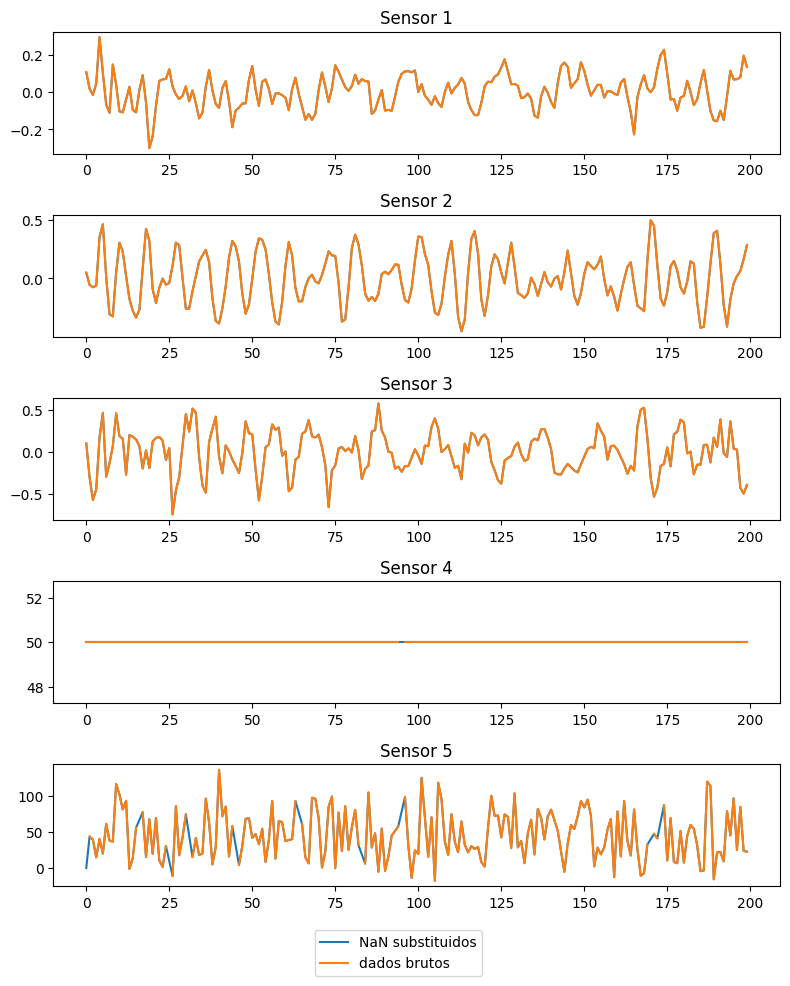

In [369]:
sensores_NaN_removidos = [dados_s1_NaN_remove , dados_s2_NaN_remove , dados_s3_NaN_remove , dados_s4_NaN_remove , dados_s5_NaN_remove]

fig, axs = plt.subplots( len(sensores), 1, figsize=(8, 10))

axs[0].plot(sensores_NaN_removidos[0][49999, :], label='dados_s1_NaN_removido')
axs[0].plot(sensores[0][49999, :], label='dados_s1')
axs[0].set_title('Sensor 1')

axs[1].plot(sensores_NaN_removidos[1][49999, :], label='dados_s2_NaN_removido')
axs[1].plot(sensores[1][49999, :], label='dados_s2')
axs[1].set_title('Sensor 2')

axs[2].plot(sensores_NaN_removidos[2][49999, :], label='dados_s3_NaN_removido')
axs[2].plot(sensores[2][49999, :], label='dados_s3')
axs[2].set_title('Sensor 3')

axs[3].plot(sensores_NaN_removidos[3][49982, :], label='dados_s4_NaN_removido')
axs[3].plot(sensores[3][49982, :], label='dados_s4')
axs[3].set_title('Sensor 4')

axs[4].plot(sensores_NaN_removidos[4][40, :], label='dados_s5_NaN_removido')
axs[4].plot(sensores[4][40, :], label='dados_s5')
axs[4].set_title('Sensor 5')

plt.legend(['NaN substituidos', 'dados brutos'], loc='upper left', bbox_to_anchor=(0.35, -0.3))
plt.tight_layout()
plt.show()

- Avaliação dos boxplots para verificação dos limites inferiores e superiores outliers e a verificar se a diferença da ordem de grandeza iria causar distorções na normalização minmax

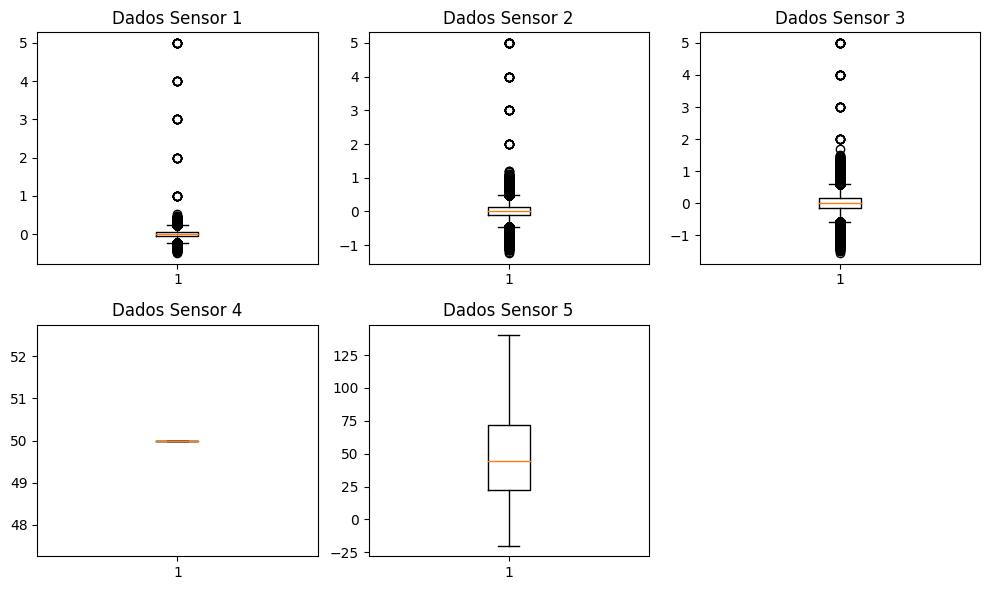

In [370]:
plt.figure(figsize=(10, 6))

for i, sensor in enumerate(sensores_NaN_removidos):
    plt.subplot(2, 3, i + 1)  # Adicionando 1 ao índice
    plt.boxplot(sensor.flatten())
    plt.title(f'Dados Sensor {i + 1}')
    
# Ajustando o layout
plt.tight_layout()

# Exibindo os boxplots
plt.show()


- Para a normalização usei a função minmax para os valores ficarem entre 0 e 1 considerando os outliers, mantendo assim o comportamento físico detectado pelo sensor (esses valores são importantes no contexto do problema, devido a possivelmente indicarem defeitos nas máquinas).

# Normalização MinMax

In [371]:
# Encontrar os valores máximo e mínimo do array
max_value_s1 = np.max(sensores_NaN_removidos[0])
min_value_s1 = np.min(sensores_NaN_removidos[0])

max_value_s2 = np.max(sensores_NaN_removidos[1])
min_value_s2 = np.min(sensores_NaN_removidos[1])

max_value_s3 = np.max(sensores_NaN_removidos[2])
min_value_s3 = np.min(sensores_NaN_removidos[2])

max_value_s4 = np.max(sensores_NaN_removidos[3])
min_value_s4 = np.min(sensores_NaN_removidos[3])

max_value_s5 = np.max(sensores_NaN_removidos[4])
min_value_s5 = np.min(sensores_NaN_removidos[4])

normalized_sensor_s1 = (sensores_NaN_removidos[0] - min_value_s1) / (max_value_s1 - min_value_s1)
normalized_sensor_s2 = (sensores_NaN_removidos[1] - min_value_s2) / (max_value_s2 - min_value_s2)
normalized_sensor_s3 = (sensores_NaN_removidos[2] - min_value_s3) / (max_value_s3 - min_value_s3)
normalized_sensor_s4 = (sensores_NaN_removidos[3] - 0) / (max_value_s4 - 0)
normalized_sensor_s5 = (sensores_NaN_removidos[4] - min_value_s5) / (max_value_s5 - min_value_s5)


- Verificação gráfica dos valores normalizados

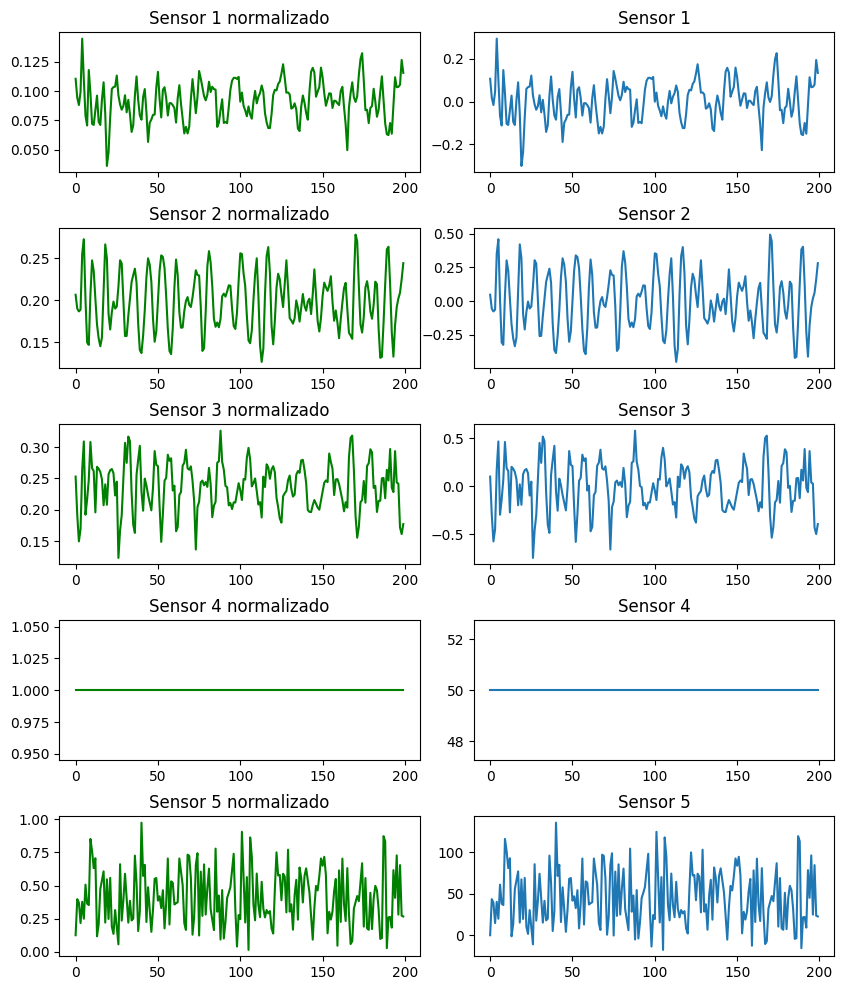

In [372]:
fig, axs = plt.subplots( len(sensores), 2, figsize=(10, 12))

axs[0, 0].plot(normalized_sensor_s1[49999, :], label='dados_s1_normalizado', color = 'g')
axs[0, 0].set_title('Sensor 1 normalizado')

axs[1, 0].plot(normalized_sensor_s2[49999, :], label='dados_s1_normalizado', color = 'g')
axs[1, 0].set_title('Sensor 2 normalizado')

axs[2, 0].plot(normalized_sensor_s3[49999, :], label='dados_s3_normalizado', color = 'g')
axs[2, 0].set_title('Sensor 3 normalizado')

axs[3,0].plot(normalized_sensor_s4[49982, :], label='dados_s4_normalizado', color = 'g')
axs[3,0].set_title('Sensor 4 normalizado')

axs[4,0].plot(normalized_sensor_s5[40, :], label='dados_s5_normalizado', color = 'g')
axs[4,0].set_title('Sensor 5 normalizado')

axs[0, 1].plot(sensores_NaN_removidos[0][49999, :], label='dados_s1')
axs[0, 1].set_title('Sensor 1')

axs[1, 1].plot(sensores_NaN_removidos[1][49999, :], label='dados_s2')
axs[1, 1].set_title('Sensor 2')

axs[2, 1].plot(sensores_NaN_removidos[2][49999, :], label='dados_s3')
axs[2, 1].set_title('Sensor 3')

axs[3,1].plot(sensores_NaN_removidos[3][49982, :], label='dados_s4')
axs[3,1].set_title('Sensor 4')

axs[4,1].plot(sensores_NaN_removidos[4][40, :], label='dados_s5')
axs[4,1].set_title('Sensor 5')

plt.subplots_adjust(hspace=0.4, wspace=0.15)

plt.show()

- Salvamento dos dados normalizados

In [373]:
np.save('data/Dados_1_normalizados.npy',normalized_sensor_s1)
np.save('data/Dados_2_normalizados.npy',normalized_sensor_s2)
np.save('data/Dados_3_normalizados.npy',normalized_sensor_s3)
np.save('data/Dados_4_normalizados.npy',normalized_sensor_s4)
np.save('data/Dados_5_normalizados.npy',normalized_sensor_s5)